In [1]:
#Q1

In [2]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

In [3]:
Delivery_time = pd.read_csv('delivery_time.csv')         #reading data & saving it into Delivery_time
Delivery_time

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
x = Delivery_time['Sorting_Time']
y = Delivery_time['Delivery_Time']

In [5]:
# #using polynomial regression formula-- = a+b*x                      b=((x-xbar)*(y-ybar))/(x-xbar)**2      a=ybar-b*xbar
# a, b = np.polynomial.polynomial.polyfit(x, y, 1)                  # 1=Degree of freedom
# print('a =',a,'b =',b)
# #plotting scatter plot
# plt.scatter(x, y)                                                # plotting scatter with x & y
# plt.plot(x, a+b*x)                                               # plotting line with x & polynomial regression
# #print(a+b*x)
# plt.title('Scatter plot Delivery Time')
# plt.xlabel('Sorting Time')
# plt.ylabel('Delivery Time')
# plt.show()

<Axes: xlabel='Delivery_Time', ylabel='Density'>

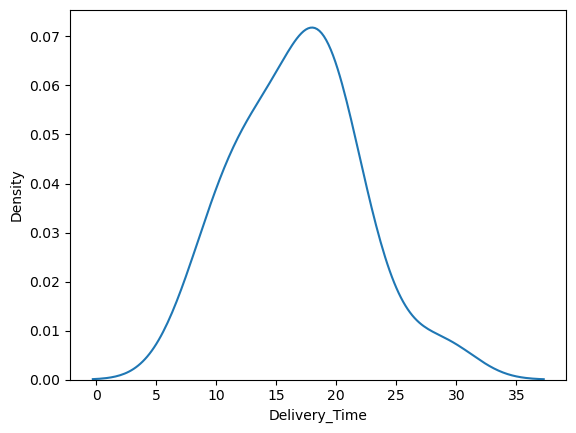

In [6]:
sns.kdeplot(Delivery_time["Delivery_Time"])
#sns.histplot(Delivery_time['Delivery_Time'],kde='True')

<Axes: xlabel='Sorting_Time', ylabel='Density'>

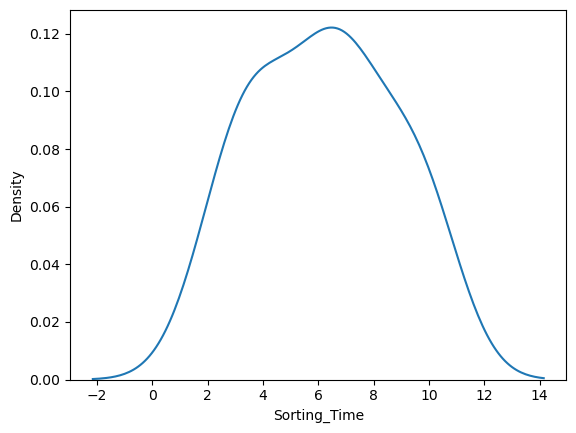

In [7]:
sns.kdeplot(Delivery_time["Sorting_Time"])
#sns.histplot(Delivery_time['Sorting_Time'],kde='True')

<Axes: xlabel='Sorting_Time', ylabel='Delivery_Time'>

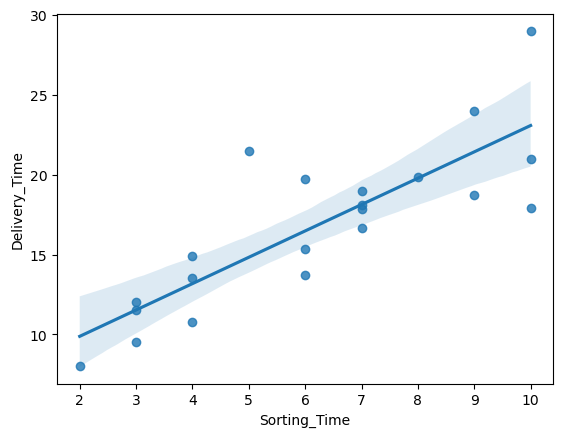

In [8]:
sns.regplot(x= Delivery_time['Sorting_Time'],y=Delivery_time['Delivery_Time'])

In [9]:
Delivery_time.corr()                                     #finding correlation
# near to 1 means strongly +ve correlation

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


In [10]:
# There are few outliers in data eventhough the correlation is good

# Model-1  Regression Model Building

In [33]:
#According to Srinivas sir
# ml_v=smf.ols('Delivery_Time~Sorting_Time',data = Delivery_time).fit()  #Delivery_Time vs Sorting_Time
# #t and p-Values
# print(ml_v.tvalues, '\n\n', ml_v.pvalues)  
# ml_v.summary()

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 

 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 11 Nov 2023   Prob (F-statistic):           3.98e-06
Time:                        19:13:52   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
model = sm.OLS(y, x).fit()
#OLS is method for estimating relationship between dependent variable and one or more independent variables.
predictions = model.predict(x)
#It predict y by taking x         y= delivery time    x = sorting time

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery_Time   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              424.5
Date:                Sat, 11 Nov 2023   Prob (F-statistic):                    6.12e-15
Time:                        19:09:19   Log-Likelihood:                         -57.349
No. Observations:                  21   AIC:                                      116.7
Df Residuals:                      20   BIC:                                      117.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting_Time     2.5652      0.125     20.603      0.000       2.306       2.825
==============================================================================
Omnibus:                        1.504   Durbin-Watson:                   1.305
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                0.508
Skew:                          -0.348   Prob(JB):                        0.776
Kurtosis:                       3.310   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model-2  Log transformation of X

In [14]:
#It's used to compress range of vals & make distribution of the data more normal. This can be helpful when the data is skewed. also helps to linearize the relationship between two variables, which improve the accuracy of the regression model.

In [15]:
x_log = np.log(Delivery_time['Sorting_Time'])

In [16]:
model = sm.OLS(y, x_log).fit()
predictions = model.predict(x_log)

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery_Time   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              791.0
Date:                Sat, 11 Nov 2023   Prob (F-statistic):                    1.48e-17
Time:                        19:09:19   Log-Likelihood:                         -51.035
No. Observations:                  21   AIC:                                      104.1
Df Residuals:                      20   BIC:                                      105.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting_Time     9.6706      0.344     28.124      0.000       8.953      10.388
==============================================================================
Omnibus:                        3.656   Durbin-Watson:                   1.453
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.164
Skew:                           0.772   Prob(JB):                        0.339
Kurtosis:                       3.298   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model-3  Log Transformation of Y

In [18]:
y_log = np.log(Delivery_time['Delivery_Time'])

In [19]:
model = sm.OLS(y_log, x).fit()
predictions = model.predict(x)

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery_Time   R-squared (uncentered):                   0.917
Model:                            OLS   Adj. R-squared (uncentered):              0.912
Method:                 Least Squares   F-statistic:                              219.7
Date:                Sat, 11 Nov 2023   Prob (F-statistic):                    3.00e-12
Time:                        19:09:19   Log-Likelihood:                         -25.284
No. Observations:                  21   AIC:                                      52.57
Df Residuals:                      20   BIC:                                      53.61
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting_Time     0.4008      0.027     14.821      0.000       0.344       0.457
==============================================================================
Omnibus:                        2.572   Durbin-Watson:                   1.446
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                1.346
Skew:                          -0.275   Prob(JB):                        0.510
Kurtosis:                       1.889   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model-4  Log Transformation of X & Y

In [21]:
model = sm.OLS(y_log, x_log).fit()
predictions = model.predict(x_log)

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery_Time   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              688.7
Date:                Sat, 11 Nov 2023   Prob (F-statistic):                    5.72e-17
Time:                        19:09:19   Log-Likelihood:                         -13.899
No. Observations:                  21   AIC:                                      29.80
Df Residuals:                      20   BIC:                                      30.84
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting_Time     1.5396      0.059     26.244      0.000       1.417       1.662
==============================================================================
Omnibus:                        1.636   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.441   Jarque-Bera (JB):                1.137
Skew:                           0.304   Prob(JB):                        0.566
Kurtosis:                       2.035   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model-5  Sq Root Transformation of X

In [23]:
# It's used to reduce variance of data & make distribution more uniform. This can be helpful when the data is not constant across different values of the independent variable. it can also help to normalize distribution of the data, which improve the accuracy of the regression model.

In [24]:
x_sqrt = np.sqrt(Delivery_time['Sorting_Time'])

In [25]:
model = sm.OLS(y, x_sqrt).fit()
predictions = model.predict(x_sqrt)

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery_Time   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              772.0
Date:                Sat, 11 Nov 2023   Prob (F-statistic):                    1.88e-17
Time:                        19:09:19   Log-Likelihood:                         -51.284
No. Observations:                  21   AIC:                                      104.6
Df Residuals:                      20   BIC:                                      105.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting_Time     6.9466      0.250     27.785      0.000       6.425       7.468
==============================================================================
Omnibus:                        6.818   Durbin-Watson:                   1.334
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                4.599
Skew:                           1.090   Prob(JB):                        0.100
Kurtosis:                       3.708   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model-6  Square Root Transformation of Y

In [27]:
y_sqrt = np.sqrt(Delivery_time['Delivery_Time'])

In [28]:
model = sm.OLS(y_sqrt, x).fit()
predictions = model.predict(x)

In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery_Time   R-squared (uncentered):                   0.930
Model:                            OLS   Adj. R-squared (uncentered):              0.927
Method:                 Least Squares   F-statistic:                              266.0
Date:                Sat, 11 Nov 2023   Prob (F-statistic):                    5.09e-13
Time:                        19:09:19   Log-Likelihood:                         -31.484
No. Observations:                  21   AIC:                                      64.97
Df Residuals:                      20   BIC:                                      66.01
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting_Time     0.5926      0.036     16.309      0.000       0.517       0.668
==============================================================================
Omnibus:                        1.452   Durbin-Watson:                   1.434
Prob(Omnibus):                  0.484   Jarque-Bera (JB):                1.105
Skew:                          -0.328   Prob(JB):                        0.575
Kurtosis:                       2.087   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model-7  Square Root Transformation of X & Y

In [30]:
model = sm.OLS(y_sqrt, x_sqrt).fit()
predictions = model.predict(x_sqrt)

In [31]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery_Time   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              1542.
Date:                Sat, 11 Nov 2023   Prob (F-statistic):                    2.10e-20
Time:                        19:09:19   Log-Likelihood:                         -13.658
No. Observations:                  21   AIC:                                      29.32
Df Residuals:                      20   BIC:                                      30.36
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting_Time     1.6364      0.042     39.267      0.000       1.549       1.723
==============================================================================
Omnibus:                        0.176   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.916   Jarque-Bera (JB):                0.231
Skew:                          -0.179   Prob(JB):                        0.891
Kurtosis:                       2.632   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Interpretation

In [32]:

# We will use Model 7 as it has the highest R value         i.e Explanatory power is  98.7%
 
# p-value < 0.05            Thus the model is accepted

# coefficient = 1.6364      i.e if value of Sorting Time increased by 1,predicted value of Delivery Time will increase by 1.6364